# Downsampled Modeling

# Table of Contents
## [Notebook Introduction](#intro)
## [Data Preprocessing](#data)
### [Train/Test Split](#split)
### [Vectorization](#vector)
## [Logistic Regression](#lr)
## [Support Vector Machines](#svm)
## [XGBoost](#xgb)
## [Full Dataset](#full)
## [Next Steps](#next)

<a id="intro"></a>
## Notebook Introduction

The purpose of this notebook is to experiment with modeling where the classes are perfectly balanced to see if it results in a better model than the previous imbalanced dataset.

<a id="data"></a>
## Data Preprocessing

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import scipy.sparse as sp
from scipy.sparse import csr_matrix


In [2]:
with open('df.pkl', 'rb') as f:
    df = pickle.load(f)
df

,product_title,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_body,year,month
0,Minnetonka Men's Double Deerskin Softsole Mocc...,1,0,0,1,,do not buy really didn t start to wear them u...,2015.0,8.0
1,Teva Men's Pajaro Flip-Flop,5,0,0,1,super flip flop,provides great cushion as well as archsupport,2015.0,8.0
3,adidas Men's 10K Lifestyle Runner Sneaker,5,0,6,1,badass,getting what u see,2015.0,8.0
4,OverBling Sneakers for Men Casual Men Shoes Ge...,3,0,0,1,three stars,small,2015.0,8.0
5,MESSI 15.3 FG/AG SOCCER SHOES (8.5),5,1,1,1,five stars,my 13 year old son loved these shoes excellent...,2015.0,8.0
...,...,...,...,...,...,...,...,...,...
4358810,Women's Evette Mid-Shaft Boots,1,0,0,0,what a waste,i purchased this shoe because it looked good ...,2002.0,10.0
4358811,Women's Bree Suede Moc Snow Joggers,5,1,1,0,you want it you need it,this little shoe boot is so great if you re th...,2002.0,10.0
4358812,Women's CanvasMule Shoes,5,0,0,0,cute,the backless mule is very comfortable cute ...,2002.0,9.0
4358813,Birki's Super Birki Unisex Clog,5,10,11,0,graceless and immense comfy and cool,my garden clogs make my feet look huge and ev...,2002.0,3.0


In [3]:
with open('2ClassDf.pkl', 'rb') as f:
    df2 = pickle.load(f)
df2

,product_title,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_body,year,month
0,Minnetonka Men's Double Deerskin Softsole Mocc...,0,0,0,1,,do not buy really didn t start to wear them u...,2015.0,8.0
1,Teva Men's Pajaro Flip-Flop,1,0,0,1,super flip flop,provides great cushion as well as archsupport,2015.0,8.0
3,adidas Men's 10K Lifestyle Runner Sneaker,1,0,6,1,badass,getting what u see,2015.0,8.0
4,OverBling Sneakers for Men Casual Men Shoes Ge...,0,0,0,1,three stars,small,2015.0,8.0
5,MESSI 15.3 FG/AG SOCCER SHOES (8.5),1,1,1,1,five stars,my 13 year old son loved these shoes excellent...,2015.0,8.0
...,...,...,...,...,...,...,...,...,...
4358810,Women's Evette Mid-Shaft Boots,0,0,0,0,what a waste,i purchased this shoe because it looked good ...,2002.0,10.0
4358811,Women's Bree Suede Moc Snow Joggers,1,1,1,0,you want it you need it,this little shoe boot is so great if you re th...,2002.0,10.0
4358812,Women's CanvasMule Shoes,1,0,0,0,cute,the backless mule is very comfortable cute ...,2002.0,9.0
4358813,Birki's Super Birki Unisex Clog,1,10,11,0,graceless and immense comfy and cool,my garden clogs make my feet look huge and ev...,2002.0,3.0


First modeling will be done on a sample size of 50000 and then a test with regular sizes. The next steps would be to downsample 1 `star_rating` to the amount of 0 `star_rating`.

In [ ]:
bad_rating = df2[df2['star_rating']==0].sample(25000, random_state=1)
good_rating = df2[df2['star_rating']==1].sample(25000, random_state=1) 

sampled_df = pd.concat([bad_rating, good_rating])

In [5]:
# Sanity check
sampled_df

,product_title,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_body,year,month
1342843,Calvin Klein Men's Wallace Suede Slip-On Loafer,0,3,3,0,many compliments runs a bit large,these are great i have had so many complimen...,2015.0,1.0
3279436,TOMS Women's Classics Flat,0,0,0,1,coming apart inner seams,shoes fit fine but are splitting at inside sea...,2013.0,9.0
2261409,Crocs Women's Springi Ballet Flat,0,0,0,1,three stars,shoe fits good and comfort only issue is feet...,2014.0,8.0
1805498,Romika Slippers Romilastic 306 Khaki,0,0,0,1,beautiful color green,very soft and supple lightweight suede nice h...,2014.0,11.0
3310089,Fergalicious Women's Gage Flat,0,0,0,1,cute but a bit tight in the toe,cute but a bit tight in the toe they have str...,2013.0,8.0
...,...,...,...,...,...,...,...,...,...
1322903,Dansko Women's Riki Clog,1,0,0,1,comfy,awesome true to size,2015.0,1.0
2237473,KLOGS USA NATALIE CLOGS ELECTRIC BLUE REPTILE ...,1,0,0,1,five stars,,2014.0,8.0
2715510,UGG Australia Women's Classic Short Lizard Stu...,1,0,0,1,snug in my uggs,great designed fabric not too blingy doesn ...,2014.0,3.0
4167999,Rocket Dog Women's Joint Fashion Sneaker,1,1,1,0,rocket dog joint,these are by far the most comfortable sneakers...,2010.0,11.0


From the previous notebook, `total_votes` had high collinearity with `helpful_votes` so it could be dropped.

In [7]:
sampled_df = sampled_df.drop(columns='total_votes')

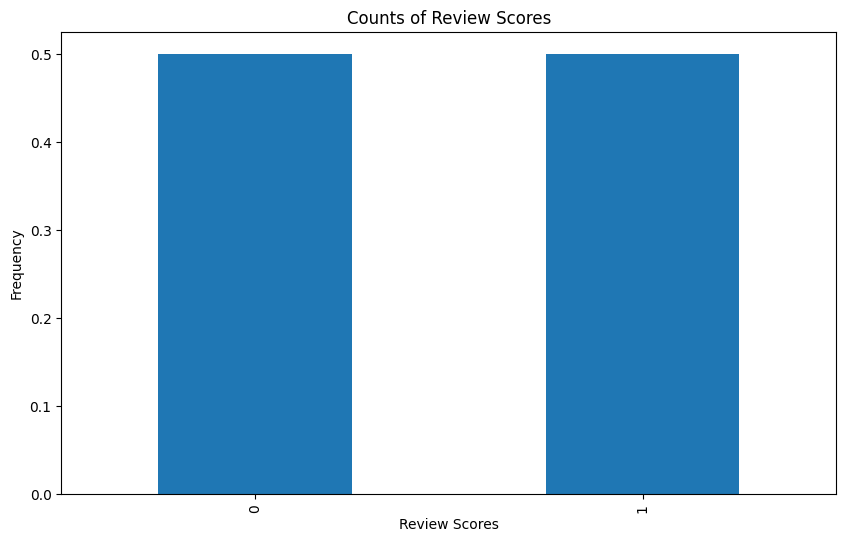

In [8]:
# Sanity check for class distribution
figure = plt.figure(figsize=(10,6))
sampled_df['star_rating'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Review Scores')
plt.ylabel('Frequency')
plt.title('Counts of Review Scores')
plt.show()

The classes are now 50/50 without class imbalance which should improve the f1-score for class 0 as the model shouldn't be overpredicting class 1 which should increase recall for class 0. Next, the process of train/test split, vectorizing, and modeling will be the same as the previous notebook so the code snippets could be reused. 

<a id="split"></a>
### Train/Test Split

In [15]:
# import the library needed to split
from sklearn.model_selection import train_test_split

# assigning Reviewer_Score as target variable and everything else as X 
X_sample = sampled_df.drop(columns=['star_rating'])
y_sample = sampled_df['star_rating']

# splitting the data 
X_remainder_sample, X_test_sample, y_remainder_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.2, random_state=1, stratify=y_sample)

In [16]:
# Creating a validation set
X_train_sample, X_valid_sample, y_train_sample, y_valid_sample = train_test_split(X_remainder_sample, y_remainder_sample, test_size=0.3, random_state=1, stratify=y_remainder_sample)

<a id="vector"></a>
### Vectorization

In [17]:
# Creating variables to be vectorized for review_body
X_train_review_sample = X_train_sample['review_body']
X_valid_review_sample = X_valid_sample['review_body']
X_test_review_sample = X_test_sample['review_body']

# X_remainder will be needed for when cv is being done
X_remainder_review_sample = X_remainder_sample['review_body']

In [18]:
# Instantiate
bag_body = CountVectorizer(stop_words="english", min_df=10) # the min_df is used to filter out random words that could pop up as well as remove some unnecessary features

# Fitting 
bag_body.fit(X_train_review_sample)

# Transform
train_bag_sample = bag_body.transform(X_train_review_sample)
valid_bag_sample = bag_body.transform(X_valid_review_sample)
test_bag_sample = bag_body.transform(X_test_review_sample)

In [19]:
# This count vectorizer is for X_remainder when cv is not done 
# Instantiate
bag_body2 = CountVectorizer(stop_words="english", min_df=10)

# Fit
bag_body2.fit(X_remainder_review_sample)

# Transform
remainder_bag_sample = bag_body2.transform(X_remainder_review_sample)
test_bag_sample2 = bag_body2.transform(X_test_review_sample)

In [20]:
# Repeat the same process for review_headline
X_train_headline_sample = X_train_sample['review_headline']
X_valid_headline_sample = X_valid_sample['review_headline']
X_test_headline_sample = X_test_sample['review_headline']

# X_remainder will be needed for when cv is being done
X_remainder_headline_sample = X_remainder_sample['review_headline']

# Instantiate
bag_headline = CountVectorizer(stop_words="english", min_df=10)

# Fitting 
bag_headline.fit(X_train_headline_sample)

# Transform
train_headline_sample = bag_headline.transform(X_train_headline_sample)
valid_headline_sample = bag_headline.transform(X_valid_headline_sample)
test_headline_sample = bag_headline.transform(X_test_headline_sample)

In [21]:
# For X_remainder
bag_headline2 = CountVectorizer(stop_words="english", min_df=10)
bag_headline2.fit(X_remainder_headline_sample)
remainder_headline_sample = bag_headline2.transform(X_remainder_headline_sample)
test_headline_sample2 = bag_headline2.transform(X_test_headline_sample)

Now that the 2 columns have been vectorized, the bag of words would need to be combined so it can go back into the dataframe. 

In [22]:
# combining headline and body
train_count = sp.hstack([train_headline_sample, train_bag_sample])
valid_count = sp.hstack([valid_headline_sample, valid_bag_sample])
test_count = sp.hstack([test_headline_sample, test_bag_sample])

In [23]:
# combining headline and bag counts
remainder_count = sp.hstack([remainder_headline_sample, remainder_bag_sample])
test_count2 = sp.hstack([test_headline_sample2, test_bag_sample2])

In [24]:
# sanity check
train_count

<28000x4064 sparse matrix of type '<class 'numpy.int64'>'
	with 486829 stored elements in Compressed Sparse Row format>

In [25]:
# Grabbing the words to be used as column headers for the bag of words above
body_words = bag_body.get_feature_names_out()
# Appending b_ to words from review_body
tagged_body_words = ['b_' + feature for feature in body_words]

headline_words = bag_headline.get_feature_names_out()
# Appending h_ to words from review_headline
tagged_headline_words = ['h_' + feature for feature in headline_words]

# Combine the two to be used in the column headers
sample_vocab = tagged_headline_words + tagged_body_words

In [26]:
# Repeat the process for X_remainder
body_words2 = bag_body2.get_feature_names_out()
tagged_body_words2 = ['b_' + feature for feature in body_words2]

headline_words2 = bag_headline2.get_feature_names_out()
tagged_headline_words2 = ['h_' + feature for feature in headline_words2]

sample_vocab2 = tagged_headline_words2 + tagged_body_words2

In [27]:
# Sanity check (should equal to the same number above for train_count
len(sample_vocab)

4064

In [28]:
# Combining the matrices of bag of words with the column names  
train_df = pd.DataFrame(train_count.toarray(), columns=sample_vocab)
valid_df = pd.DataFrame(valid_count.toarray(), columns=sample_vocab)
test_df = pd.DataFrame(test_count.toarray(), columns=sample_vocab)

In [29]:
# Repeat for X_remainder
remainder_df = pd.DataFrame(remainder_count.toarray(), columns=sample_vocab2)
test_df2 = pd.DataFrame(test_count2.toarray(), columns=sample_vocab2)

Now that the review_headline and review_body have been vectorized, the string columns can be dropped and replaced.

In [30]:
# dropping string columns
X_train_sample = X_train_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])
X_valid_sample = X_valid_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])
X_test_sample = X_test_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])

In [31]:
# Repeat for X_remainder
X_remainder_sample = X_remainder_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])

In [32]:
# combining the dataframe of bag of words back with the original dataframe
combined_train = pd.concat([X_train_sample, train_df], axis=1)
combined_valid = pd.concat([X_valid_sample, valid_df], axis=1)
combined_test = pd.concat([X_test_sample, test_df], axis=1)

In [33]:
# Repeat for X_remainder
combined_remainder = pd.concat([X_remainder_sample, remainder_df], axis=1)
combined_test2 = pd.concat([X_test_sample, test_df2], axis=1)

In [34]:
# Sanity Check
combined_train

,helpful_votes,verified_purchase,year,month,h_10,h_100,h_11,h_12,h_13,h_2nd,...,b_yrs,b_zapatos,b_zappos,b_zero,b_zip,b_zipped,b_zipper,b_zippers,b_zipping,b_zumba
0,0,0,2007.0,9.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,2015.0,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2015.0,7.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2010.0,9.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,2008.0,10.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,1,2015.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,2,1,2015.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27997,0,1,2015.0,8.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,2,0,2014.0,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The last thing to do before feeding the data into the models is that the data will need to be scaled. The `StandardScalar` will be used for basic modeling and could be changed when hyperparameter optimization.

In [40]:
# Instantiate
ss = StandardScaler()

# Fit and tranform
X_train_scaled = ss.fit_transform(combined_train)
X_valid_scaled = ss.transform(combined_valid)
X_test_scaled = ss.transform(combined_test)

In [41]:
# For X_remainder
ss2 = StandardScaler()
X_remainder_scaled = ss.fit_transform(combined_remainder)
X_test_scaled2 = ss.transform(combined_test2)

<a id="lr"></a>
## Logistic Regression

The modeling from the imbalanced dataset can be leveraged to streamline the gridsearch's parameters for each model in this downsampled dataset.

In [35]:
%%time
from sklearn.preprocessing import MinMaxScaler
estimators = [('normalise', StandardScaler()),
              ('model', LogisticRegression())]

pipe = Pipeline(estimators)

param_grid = {
    'normalise': [StandardScaler(), MinMaxScaler(), None],
    'model': [LogisticRegression(max_iter=10000)],
    'model__solver': ['liblinear'], # liblinear seemed to always outperform saga and lbfgs so just using liblinear 
    'model__penalty': ["l1", "l2"],
    'model__C': [0.0001, 0.001, 0.01] # using the best c values from the earlier modeling
}

grid_LR = GridSearchCV(pipe, param_grid, cv=5, verbose=2)
fittedgrid_LR = grid_LR.fit(combined_remainder, y_remainder_sample)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END model=LogisticRegression(max_iter=10000), model__C=0.0001, model__penalty=l1, model__solver=liblinear, normalise=StandardScaler(); total time=  12.1s
[CV] END model=LogisticRegression(max_iter=10000), model__C=0.0001, model__penalty=l1, model__solver=liblinear, normalise=StandardScaler(); total time=  10.9s
[CV] END model=LogisticRegression(max_iter=10000), model__C=0.0001, model__penalty=l1, model__solver=liblinear, normalise=StandardScaler(); total time=  10.9s
[CV] END model=LogisticRegression(max_iter=10000), model__C=0.0001, model__penalty=l1, model__solver=liblinear, normalise=StandardScaler(); total time=  10.9s
[CV] END model=LogisticRegression(max_iter=10000), model__C=0.0001, model__penalty=l1, model__solver=liblinear, normalise=StandardScaler(); total time=  10.8s
[CV] END model=LogisticRegression(max_iter=10000), model__C=0.0001, model__penalty=l1, model__solver=liblinear, normalise=MinMaxScaler(); total 

In [36]:
fittedgrid_LR.best_params_

{'model': LogisticRegression(C=0.01, max_iter=10000, penalty='l1', solver='liblinear'),
 'model__C': 0.01,
 'model__penalty': 'l1',
 'model__solver': 'liblinear',
 'normalise': StandardScaler()}

In [45]:
# Scoring the model
lr = LogisticRegression(C=0.01, max_iter=10000, penalty='l1', solver='liblinear')
lr.fit(X_remainder_scaled, y_remainder_sample)
lr.score(X_test_scaled2, y_test_sample)

0.7935

| Model                                | Accuracy |
|--------------------------------------|----------|
| Logistic Regression (lbfgs)          | 79.29%   |
| Logistic Regression (liblinear)      | 80.08%   |
| Logistic Regression (saga)           | 79.34%   |
| Logistic Regression (Gridsearch)     | 80.64%   |
| SVM (Default Parameters)             | 78.65%   |
| XGBoost (Gridsearch)                 | 80.10%   |
| XGBoost (Gridsearch pt.2)            | 80.65%   |
| Downsampled LR (Gridsearch)          | 79.35%   |


In [46]:
# saving the models
with open('DS_lr.pkl', 'wb') as f:
    pickle.dump(lr, f)

The best model from the gridsearch ended up being the same hyperparameters the imbalanced dataset but the accuracy score had droppped by ~1% when compared to the imbalance dataset. That 1% difference could be because the overprediction of majority class and the most important part to doing the  modeling on downsampled data is for recall and precision which will be looked at next.

              precision    recall  f1-score   support

           0       0.83      0.74      0.78      5000
           1       0.76      0.85      0.80      5000

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000



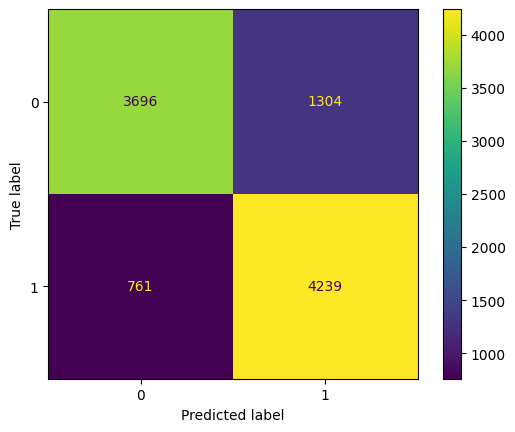

In [144]:
# Get rating predictions
y_pred = lr.predict(X_test_scaled2)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test_sample, y_pred)
print(classification_report(y_test_sample, y_pred))

# Visualizing confusion matrix
ConfusionMatrixDisplay.from_estimator(lr, X_test_scaled2, y_test_sample)

When comparing to the previous imbalanced class results, the precision and recall of class 0 did increase from 81% to 83% (precision) and 61% to 74%, an increase of 13% which is pretty significant. However, there was a tradeoff as the precision and recall of class 1 had decreased as a result where precision had dropped from 78% to 76% and 90% to 85% for recall. This model is still better than the imbalanced dataset since the f1-score is a lot closer between the two classes indicating a more true prediction model.

<a id="svm"></a>
## SVM

In [52]:
%%time
SVM = svm.SVC()
SVM.fit(X_train_scaled, y_train_sample)
score = SVM.score(X_test_scaled, y_test_sample)
score

CPU times: user 1h 22min 41s, sys: 1.16 s, total: 1h 22min 42s
Wall time: 1h 24min 27s


0.7651

In [53]:
# saving the models
with open('DS_SVM.pkl', 'wb') as f:
    pickle.dump(SVM, f)

| Model                                | Accuracy |
|--------------------------------------|----------|
| Logistic Regression (lbfgs)          | 79.29%   |
| Logistic Regression (liblinear)      | 80.08%   |
| Logistic Regression (saga)           | 79.34%   |
| Logistic Regression (Gridsearch)     | 80.64%   |
| SVM (Default Parameters)             | 78.65%   |
| XGBoost (Gridsearch)                 | 80.10%   |
| XGBoost (Gridsearch pt.2)            | 80.65%   |
| Downsampled LR (Gridsearch)          | 79.35%   |
| Downsampled SVM (Default Paramaters) | 76.51%   |

Again, SVM did not perform any better than logisitic regression in terms of test score accuracy since it performed the worst so far with a test score accuracy of 76.51%. Similar to the downsampled logisitic regression, downsampling did not help test score accuracy of SVM. It was ~2% worse than the imbalanced dataset with SVM and ~3% worse than the logisitic regression with downsampled data. Next is to look at the confusion matrix to see if it at least improved precision and recall.

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      5000
           1       0.75      0.79      0.77      5000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.76     10000
weighted avg       0.77      0.77      0.76     10000



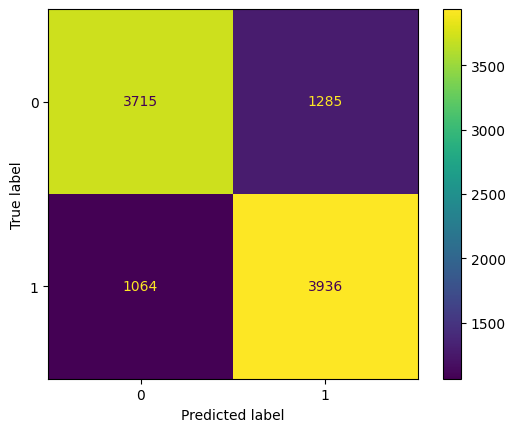

In [54]:
# Get rating predictions
y_pred = SVM.predict(X_test_scaled)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test_sample, y_pred)
print(classification_report(y_test_sample, y_pred))

# Visualizing confusion matrix
ConfusionMatrixDisplay.from_estimator(SVM, X_test_scaled, y_test_sample)

The confusion matrix and classification report shows that the SVM performed worse in all the metrics as the logistic regression had higher values in precision and recall (thus f1-score). SVM (at least default parameters) does not seem like a good model for the purpose of this project as it performs worse and takes too long to run. Next, model to run is XGBoost.

<a id="xgb"></a>
## XGBoost

In [ ]:
# Creating a pipeline and grid search for XGBoost
estimators = [('model', XGBClassifier())]

pipe = Pipeline(estimators)

param_grid = {
    'model': [XGBClassifier()],
    'model__max_depth': [3, 4, 5, 6],
    'model__learning_rate': [0.1, 0.01, 0.001],
    'model__n_estimators': [100, 200, 300],
}

grid_XGB = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid_XGB = grid_XGB.fit(X_remainder_scaled, y_remainder_sample)

In [82]:
fittedgrid_XGB.best_params_

{'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=6, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=300, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 'model__learning_rate': 0.1,
 'model__max_depth': 6,
 'model__n_estimators': 300}

In [113]:
# scoring the best model
XGB = XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators = 300)
XGB.fit(X_remainder_scaled, y_remainder_sample) # Using remainder insted of validation as no hyperparameter optimization needed
XGB.score(X_test_scaled2, y_test_sample)

0.783

| Model                                | Accuracy |
|--------------------------------------|----------|
| Logistic Regression (lbfgs)          | 79.29%   |
| Logistic Regression (liblinear)      | 80.08%   |
| Logistic Regression (saga)           | 79.34%   |
| Logistic Regression (Gridsearch)     | 80.64%   |
| SVM (Default Parameters)             | 78.65%   |
| XGBoost (Gridsearch)                 | 80.10%   |
| XGBoost (Gridsearch pt.2)            | 80.65%   |
| Downsampled LR (Gridsearch)          | 79.35%   |
| Downsampled SVM (Default Paramaters) | 76.51%   |
| Downsampled XGBoost (Gridsearch)     | 78.30%    |

In [131]:
# saving the model
with open('DS_XGB.pkl', 'wb') as f:
    pickle.dump(XGB, f)

Look at the other metrics next to see if maybe it is performing better. 

              precision    recall  f1-score   support

           0       0.81      0.74      0.77      5000
           1       0.76      0.82      0.79      5000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



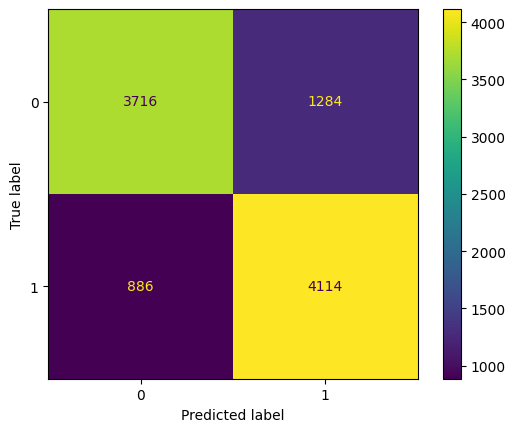

In [134]:
# Get rating predictions
y_pred = XGB.predict(X_test_scaled2)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test_sample, y_pred)
print(classification_report(y_test_sample, y_pred))

# Visualizing confusion matrix
ConfusionMatrixDisplay.from_estimator(XGB, X_test_scaled2, y_test_sample)

The metrics show worse result when compared to logistic regression with a 0.02 decrease in precision for class 0 and a 0.03 decrease in recall for class 1. Maybe if the hyperparameters were further optimized, the result might be better like with the imbalanced dataset. 

In [ ]:
# Another gridsearch to further finetune
estimators = [('model', XGBClassifier())]

pipe = Pipeline(estimators)

param_grid = {
    'model': [XGBClassifier()],
    'model__max_depth': [5, 6], # The larger the depth, the longer it takes to run
    'model__learning_rate': [1, 0.5], 
    'model__n_estimators': [500, 1000],
}

grid_XGB2 = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid_XGB2 = grid_XGB2.fit(X_remainder_scaled, y_remainder_sample)

In [91]:
# Get the best parameters and score
XGB_params2 = fittedgrid_XGB2.best_params_
XGB_params2

{'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.5, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=500, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 'model__learning_rate': 0.5,
 'model__max_depth': 5,
 'model__n_estimators': 500}

In [115]:
# scoring the best model
XGB2 = XGBClassifier(learning_rate=0.5, max_depth=5, n_estimators = 500)
XGB2.fit(X_remainder_scaled, y_remainder_sample) # Using remainder insted of validation as no hyperparameter optimization needed
XGB2.score(X_test_scaled2, y_test_sample)

0.7854

| Model                                | Accuracy |
|--------------------------------------|----------|
| Logistic Regression (lbfgs)          | 79.29%   |
| Logistic Regression (liblinear)      | 80.08%   |
| Logistic Regression (saga)           | 79.34%   |
| Logistic Regression (Gridsearch)     | 80.64%   |
| SVM (Default Parameters)             | 78.65%   |
| XGBoost (Gridsearch)                 | 80.10%   |
| XGBoost (Gridsearch pt.2)            | 80.65%   |
| Downsampled LR (Gridsearch)          | 79.35%   |
| Downsampled SVM (Default Paramaters) | 76.51%   |
| Downsampled XGBoost (Gridsearch)     | 78.30%    |
| Downsampled XGBoost (Gridsearch pt.2)     | 78.54%    |

In [130]:
# saving the model
with open('DS_XGB2.pkl', 'wb') as f:
    pickle.dump(XGB2, f)

The model did improve by .24% compared to the previous grid search for XGBoost. Now, let's examine the confusion matrix to see if those metrics increased as well.

              precision    recall  f1-score   support

           0       0.81      0.74      0.78      5000
           1       0.76      0.83      0.79      5000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



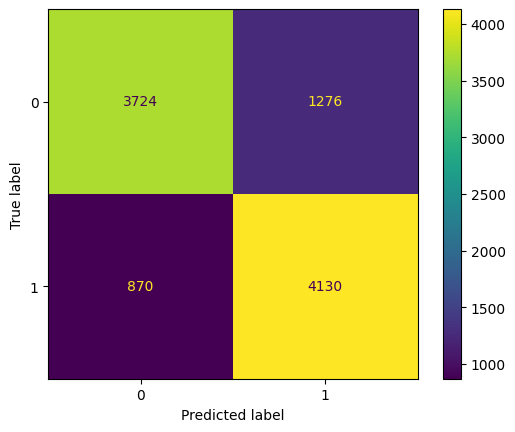

In [129]:
# Get rating predictions
y_pred = XGB2.predict(X_test_scaled2)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test_sample, y_pred)
print(classification_report(y_test_sample, y_pred))

# Visualizing confusion matrix
ConfusionMatrixDisplay.from_estimator(XGB2, X_test_scaled2, y_test_sample)

XGBoost did perform slightly better than the previous XGBoost model with a increase in recall for class 1 by 0.01. However, it stil did not beat the downsampled logisitic regression model. Therefore, the best model and most accurate model is a downsampled logistic regression, although the test accuracy was lower than the XGBoost with imbalanced datset, the metrics shows that it is a more true predictor as the f1-score (0.78 for class 0 to 0.80 for class 1) are more similar than XGBoost's f1-scores (0.74 for class 0 and 0.85 for class 1). 

One thing to note about this downsampled modeling was that there was still issues with recall of class 0 where actual 'bad reviews' were predicted as class 1, 'good reviews'. To examine this problem, the 

In [139]:
X_test_review_sample

934562     i loved these shoes  until the soles on both s...
2061601                                            too small
2330575         fit true  feel awesome after a couple rides 
1573093    overall content with my purchase however the b...
2741873    i was a little weary about buying shoes online...
                                 ...                        
1093654    great for waitressing all day long  comfy and ...
53892      they re not all black as pictured  there s a d...
1968489    kinda flimsy   the hanging strap broke the fir...
2435178    it took a little getting used to this shoe  bu...
3732296    i have no complaints whatsoever about these bo...
Name: review_body, Length: 10000, dtype: object

In [152]:
# indices of rows where actual bad reviews were predicted as good reviews
incorrect_indices = np.where((y_pred == 1) & (y_test_sample == 0))[0]

# Print the rows with incorrect predictions
for i in incorrect_indices[:10]:
    print(X_test_review_sample.iloc[i])
    print("\n")

is dificult wearing


i love these shoes they came in very quickly  2 days tops  i did order a half size up and i m glad i did because they fit perfectly  i m a 7  7 1 2 and i ordered a size 8  the shoes are not very comfortable  but i figured they wouldnt be  most shoes like this arent  overall satisfied and loved my purchase    


no comment


i got these shoes for gym and outside use  there great  a little tight but they fit great after a few uses  light and some what water resistant  great buy for the money will order more shoes in a few months 


nice slippers  but definitely not size 12 


this pair was for my wife  br   these shoes fit some hard compared to the black one  br   however these are wonderful shoes 


these are great everyday shoes for kicking around in  great with jeans but i would not consider these to be running shoes  which is fine by me   i had a pair of the regular jazz  not low pro  and loved them for years until they finally wore out  overall a great  very co

Looking at the results above, the model might have trouble with short reviews like `"is difficult wearing"` and `"no comment"`. It also seems to predict good review when customers bring up multiple good points to the shoe and then 1 or 2 negative points. This might be an issue mainly because of the way the 2 classes were set up with good review being only 5 stars, it might be better to include 4 stars as well since 4 stars generally means a good product with a minor flaw. Another method could be 1 star as a class by itself and the other 4 stars as the other class. There also seems to be reviews that only have good points but aren't scored 5 stars like `"nice shoes"`, and `"very nice formal good shoe"` which would be more of user error and would always be an issue no matter how perfect the model can be in predicting.

Now that the best model has been determined, instead of using a sample dataset, the full dataset can be ran through the preprocessing and modeling. The next section is the code to run through with the full dataset. However, due to run-time and memory issues, the same preprocessing couldn't be done with the full dataset since the sample dataset used dense matrices but for the full dataset, sparse matrices had to be used the whole way through. Therefore, the code below is mainly a prototype on how modeling would go for the full dataset and is not meant for in-depth analysis and metrics.  

<a id="full"></a>
## Full Dataset

In [38]:
# Grabbing the size of 0 class to downsample class 1 to
size = df2[df2['star_rating']==0].shape[0]
size

1532849

In [39]:
bad_rating = df2[df2['star_rating']==0]
good_rating = df2[df2['star_rating']==1].sample(size, random_state=1) 

sampled_df = pd.concat([bad_rating, good_rating])

In [40]:
# Sanity check
sampled_df

,product_title,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_body,year,month
0,Minnetonka Men's Double Deerskin Softsole Mocc...,0,0,0,1,,do not buy really didn t start to wear them u...,2015,8
4,OverBling Sneakers for Men Casual Men Shoes Ge...,0,0,0,1,three stars,small,2015,8
7,Olukai Nohea Mesh Shoe - Men's,0,0,0,1,good deal but had to go a full size down,i went a full size down and they fit better bu...,2015,8
9,Alegria Women's Seville Clog,0,0,0,1,too small,the size is misleading,2015,8
12,Versace Collection Black Perforated Leather Lo...,0,1,1,1,four stars,good quality shoes great for casual or busine...,2015,8
...,...,...,...,...,...,...,...,...,...
2630966,Nina Dally Mary Jane (Toddler/Little Kid/Big Kid),1,0,0,1,finally,finally found a comfortable shoe for my daught...,2014,4
3093800,Phenas? Girl's Lovely Sweet Bowknot Leisure Ca...,1,1,1,1,great buy,my daughter love this bag and takes it to scho...,2013,11
293111,Skechers USA Men's Relaxed Fit Memory Foam Sup...,1,0,0,1,five stars,great shoes very comfortable normally wear a...,2015,7
2088909,Brinley Co Womens Lace-up Wedge Bootie,1,0,0,0,beautiful shoes,i was a little worried these would run small b...,2014,9


The 3065698 rows match to 1532849 multiplied by 2.

In [41]:
# Sanity check
sampled_df['star_rating'].value_counts()

0    1532849
1    1532849
Name: star_rating, dtype: int64

In [42]:
# total_votes and helpful_votes has high correlation so had to drop total_votes
sampled_df.drop(columns='total_votes')

,product_title,star_rating,helpful_votes,verified_purchase,review_headline,review_body,year,month
0,Minnetonka Men's Double Deerskin Softsole Mocc...,0,0,1,,do not buy really didn t start to wear them u...,2015,8
4,OverBling Sneakers for Men Casual Men Shoes Ge...,0,0,1,three stars,small,2015,8
7,Olukai Nohea Mesh Shoe - Men's,0,0,1,good deal but had to go a full size down,i went a full size down and they fit better bu...,2015,8
9,Alegria Women's Seville Clog,0,0,1,too small,the size is misleading,2015,8
12,Versace Collection Black Perforated Leather Lo...,0,1,1,four stars,good quality shoes great for casual or busine...,2015,8
...,...,...,...,...,...,...,...,...
2630966,Nina Dally Mary Jane (Toddler/Little Kid/Big Kid),1,0,1,finally,finally found a comfortable shoe for my daught...,2014,4
3093800,Phenas? Girl's Lovely Sweet Bowknot Leisure Ca...,1,1,1,great buy,my daughter love this bag and takes it to scho...,2013,11
293111,Skechers USA Men's Relaxed Fit Memory Foam Sup...,1,0,1,five stars,great shoes very comfortable normally wear a...,2015,7
2088909,Brinley Co Womens Lace-up Wedge Bootie,1,0,0,beautiful shoes,i was a little worried these would run small b...,2014,9


#### Train/Test Split

In [43]:
# assigning Reviewer_Score as target variable and everything else as X 
X_sample = sampled_df.drop(columns=['star_rating'])
y_sample = sampled_df['star_rating']

# splitting the data 
X_remainder_sample, X_test_sample, y_remainder_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.2, random_state=1, stratify=y_sample)

In [44]:
# Creating a validation set
X_train_sample, X_valid_sample, y_train_sample, y_valid_sample = train_test_split(X_remainder_sample, y_remainder_sample, test_size=0.3, random_state=1, stratify=y_remainder_sample)

#### Vectorization

The `review_body` and `review_headline` need to be vectorized so there is only numeric columns before modeling can be done. For vectorizing, bag of words will be used.

In [45]:
X_train_review_sample = X_train_sample['review_body']
X_valid_review_sample = X_valid_sample['review_body']
X_test_review_sample = X_test_sample['review_body']

# X_remainder will be needed for when cv is being done
X_remainder_review_sample = X_remainder_sample['review_body']

In [46]:
# sampled_df = sampled_df.drop(columns=['product_title', 'review_headline', 'review_body'])

In [47]:
%%time
# Instantiate
stemmer = PorterStemmer()

bag_body = CountVectorizer(stop_words="english", min_df=250)

# Fitting 
bag_body.fit(X_train_review_sample)


# Transform
train_bag_sample = bag_body.transform(X_train_review_sample)
valid_bag_sample = bag_body.transform(X_valid_review_sample)
test_bag_sample = bag_body.transform(X_test_review_sample)

CPU times: total: 1min 59s
Wall time: 1min 59s


In [48]:
%%time
# This one is for X_remainder when cv is not done 

### For X_remainder
bag_body2 = CountVectorizer(stop_words="english", min_df=250)
bag_body2.fit(X_remainder_review_sample)
remainder_bag_sample = bag_body2.transform(X_remainder_review_sample)
test_bag_sample2 = bag_body2.transform(X_test_review_sample)

CPU times: total: 2min 17s
Wall time: 2min 17s


In [49]:
X_train_headline_sample = X_train_sample['review_headline']
X_valid_headline_sample = X_valid_sample['review_headline']
X_test_headline_sample = X_test_sample['review_headline']
# X_remainder will be needed for when cv is being done
X_remainder_headline_sample = X_remainder_sample['review_headline']

In [50]:
%%time
# Instantiate
bag_headline = CountVectorizer(stop_words="english", min_df=50)

# Fitting 
bag_headline.fit(X_train_headline_sample)

# Transform
train_headline_sample = bag_headline.transform(X_train_headline_sample)
valid_headline_sample = bag_headline.transform(X_valid_headline_sample)
test_headline_sample = bag_headline.transform(X_test_headline_sample)

CPU times: total: 25.1 s
Wall time: 25.1 s


In [51]:
%%time
# For X_remainder
bag_headline2 = CountVectorizer(stop_words="english", min_df=50)
bag_headline2.fit(X_remainder_headline_sample)
remainder_headline_sample = bag_headline2.transform(X_remainder_headline_sample)
test_headline_sample2 = bag_headline2.transform(X_test_headline_sample)

CPU times: total: 28.8 s
Wall time: 28.8 s


In [52]:
bag_headline.get_feature_names_out()

array(['00', '10', '100', ..., 'zipper', 'zippers', 'zumba'], dtype=object)

In [53]:
# combining headline and bag counts
train_count = sp.hstack([train_headline_sample, train_bag_sample])
valid_count = sp.hstack([valid_headline_sample, valid_bag_sample])
test_count = sp.hstack([test_headline_sample, test_bag_sample])

In [54]:
# combining headline and bag counts
remainder_count = sp.hstack([remainder_headline_sample, remainder_bag_sample])
test_count2 = sp.hstack([test_headline_sample2, test_bag_sample2])

In [55]:
train_count

<1716790x8640 sparse matrix of type '<class 'numpy.int64'>'
	with 30931693 stored elements in Compressed Sparse Row format>

In [56]:
body_words = bag_body.get_feature_names_out()
tagged_body_words = ['b_' + feature for feature in body_words]
headline_words = bag_headline.get_feature_names_out()
tagged_headline_words = ['h_' + feature for feature in headline_words]
sample_vocab = tagged_headline_words + tagged_body_words

In [57]:
# FOR X_REMAINDER
body_words2 = bag_body2.get_feature_names_out()
tagged_body_words2 = ['b_' + feature for feature in body_words2]
headline_words2 = bag_headline2.get_feature_names_out()
tagged_headline_words2 = ['h_' + feature for feature in headline_words2]
sample_vocab2 = tagged_headline_words2 + tagged_body_words2

In [58]:
len(sample_vocab)

8640

In [59]:
train_count

<1716790x8640 sparse matrix of type '<class 'numpy.int64'>'
	with 30931693 stored elements in Compressed Sparse Row format>

In [60]:
train_sparse = csr_matrix(train_count)
train_df = pd.DataFrame.sparse.from_spmatrix(train_sparse, columns=sample_vocab)
valid_sparse = csr_matrix(valid_count)
valid_df = pd.DataFrame.sparse.from_spmatrix(valid_sparse, columns=sample_vocab)
# valid_df = pd.SparseDataFrame(valid_count, columns=sample_vocab)
test_sparse = csr_matrix(test_count)
test_df = pd.DataFrame.sparse.from_spmatrix(test_sparse, columns=sample_vocab)
# test_df = pd.SparseDataFrame(test_count, columns=sample_vocab)

In [61]:
# For X_remainder
remainder_sparse = csr_matrix(remainder_count)
remainder_df = pd.DataFrame.sparse.from_spmatrix(remainder_sparse, columns=sample_vocab2)

test_sparse2 = csr_matrix(test_count2)
test_df2 = pd.DataFrame.sparse.from_spmatrix(test_sparse2, columns=sample_vocab2)

# remainder_df = pd.DataFrame(remainder_count.toarray(), columns=sample_vocab2)
# test_df2 = pd.DataFrame(test_count2.toarray(), columns=sample_vocab2)

In [62]:
X_train_sample = X_train_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])
X_valid_sample = X_valid_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])
X_test_sample = X_test_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])

In [63]:
# For X_remainder
X_remainder_sample = X_remainder_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])

In [64]:
combined_train = pd.concat([X_train_sample, train_df], axis=1)
combined_valid = pd.concat([X_valid_sample, valid_df], axis=1)
combined_test = pd.concat([X_test_sample, test_df], axis=1)

In [65]:
# For X_remainder
combined_remainder = pd.concat([X_remainder_sample, remainder_df], axis=1)
combined_test2 = pd.concat([X_test_sample, test_df2], axis=1)

In [66]:
combined_test2

,helpful_votes,total_votes,verified_purchase,year,month,h_00,h_10,h_100,h_1000,h_10m,...,b_zipped,b_zipper,b_zippered,b_zippers,b_zipping,b_zips,b_zone,b_zoo,b_zoom,b_zumba
0,0,0,1,2012,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,2014,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2015,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,2012,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,2015,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613135,0,0,1,2014,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
613136,1,1,1,2014,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
613137,0,1,1,2015,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
613138,0,0,1,2013,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# Processing the conversion of dense matrix to sparse matrix for scaling
batch_size = 100000
n = int(np.ceil(len(combined_train) / batch_size)) # number of batches
sparse_matrices = [] # used to hold the each batch of sparse matrices 

for i in range(n):
    start_i = i * batch_size
    end_i = (i + 1) * batch_size
    # an if statement so the index doesn't go above the max range of the dataframe
    if end_i > len(combined_train):
        end_i = None # setting None as that is the last index of the dataframe
    batch = combined_train.iloc[start_i:end_i]
    sparse_matrix = sp.csr_matrix(batch.values)
    sparse_matrices.append(sparse_matrix)

combined_train = sp.vstack(sparse_matrices)

In [72]:
# Processing the conversion of dense matrix to sparse matrix for scaling
batch_size = 100000
n = int(np.ceil(len(combined_valid) / batch_size)) # number of batches
sparse_matrices = [] # used to hold the each batch of sparse matrices 

for i in range(n):
    start_i = i * batch_size
    end_i = (i + 1) * batch_size
    # an if statement so the index doesn't go above the max range of the dataframe
    if end_i > len(combined_valid):
        end_i = None # setting -1 as that is the last index of the dataframe
    batch = combined_valid.iloc[start_i:end_i]
    sparse_matrix = sp.csr_matrix(batch.values)
    sparse_matrices.append(sparse_matrix)

combined_valid = sp.vstack(sparse_matrices)

In [73]:
# Processing the conversion of dense matrix to sparse matrix for scaling
batch_size = 100000
n = int(np.ceil(len(combined_test) / batch_size)) # number of batches
sparse_matrices = [] # used to hold the each batch of sparse matrices 

for i in range(n):
    start_i = i * batch_size
    end_i = (i + 1) * batch_size
    # an if statement so the index doesn't go above the max range of the dataframe
    if end_i > len(combined_test):
        end_i = None # setting None as that is the last index of the dataframe
    batch = combined_test.iloc[start_i:end_i]
    sparse_matrix = sp.csr_matrix(batch.values)
    sparse_matrices.append(sparse_matrix)

combined_test = sp.vstack(sparse_matrices)

In [92]:
# Processing the conversion of dense matrix to sparse matrix for scaling
batch_size = 100000
n = int(np.ceil(len(combined_remainder) / batch_size)) # number of batches
sparse_matrices = [] # used to hold the each batch of sparse matrices 

for i in range(n):
    start_i = i * batch_size
    end_i = (i + 1) * batch_size
    # an if statement so the index doesn't go above the max range of the dataframe
    if end_i > len(combined_remainder):
        end_i = None # setting None as that is the last index of the dataframe
    batch = combined_remainder.iloc[start_i:end_i]
    sparse_matrix = sp.csr_matrix(batch.values)
    sparse_matrices.append(sparse_matrix)

combined_remainder = sp.vstack(sparse_matrices)

In [98]:
# Processing the conversion of dense matrix to sparse matrix for scaling
batch_size = 100000
n = int(np.ceil(len(combined_test2) / batch_size)) # number of batches
sparse_matrices = [] # used to hold the each batch of sparse matrices 

for i in range(n):
    start_i = i * batch_size
    end_i = (i + 1) * batch_size
    # an if statement so the index doesn't go above the max range of the dataframe
    if end_i > len(combined_test2):
        end_i = None # setting None as that is the last index of the dataframe
    batch = combined_test2.iloc[start_i:end_i]
    sparse_matrix = sp.csr_matrix(batch.values)
    sparse_matrices.append(sparse_matrix)

combined_test2 = sp.vstack(sparse_matrices)

In [74]:
# Instantiate
ss = StandardScaler(with_mean=False) # need with_mean=False for sparse matrix

# Fit and tranform
X_train_scaled = ss.fit_transform(combined_train)
X_valid_scaled = ss.transform(combined_valid)
X_test_scaled = ss.transform(combined_test)

In [99]:
# For X_remainder
ss = StandardScaler(with_mean=False)
X_remainder_scaled = ss.fit_transform(combined_remainder)
X_test_scaled2 = ss.transform(combined_test2)

## Logistic Regression

The logistic regression will be the model with the best parameters for logistic regression from the sample modeling.

In [76]:
lr = LogisticRegression(C=0.01, max_iter=10000, penalty='l1', solver='liblinear')
lr.fit(X_train_scaled, y_train_sample)
lr.score(X_test_scaled, y_test_sample)

0.8072267345141403

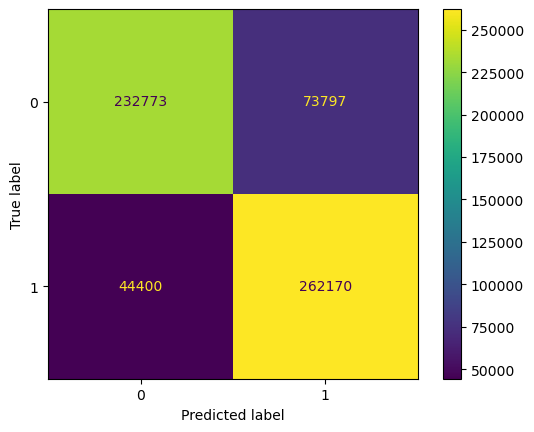

In [77]:
ConfusionMatrixDisplay.from_estimator(log3, X_test_scaled, y_test_sample);

In [78]:
# Get rating predictions
y_pred = log3.predict(X_test_scaled)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test_sample, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted 0", "Predicted 1"],
    index=["True 0", "True 1"]
)
display(cf_df)

print(classification_report(y_test_sample, y_pred))

,Predicted 0,Predicted 1
True 0,232773,73797
True 1,44400,262170


              precision    recall  f1-score   support

           0       0.84      0.76      0.80    306570
           1       0.78      0.86      0.82    306570

    accuracy                           0.81    613140
   macro avg       0.81      0.81      0.81    613140
weighted avg       0.81      0.81      0.81    613140



Running the full dataset seems to improve the model slightly and this could be due to the fact that there is more training data. However, the score is still around 80% which isn't that big of an increase.

In [ ]:
#### DOES NOT RUN DUE TO MEMORY ISSUE
# word_counts = pd.DataFrame({"counts":log3.coef_[0]}, index=combined_train.columns).sort_values("counts", ascending=False)
# word_counts.head(30).plot(kind="bar", figsize=(15, 5), legend=False)
# plt.title("Top 30 most predictive features of a good review")
# plt.ylabel("coeff")
# plt.xticks(rotation=45)
# plt.show()

SVM can not be ran as it either ran into memory issues a lot.

## XGBoost

XGBoost was able to run after some time but forgot to score the best model but did manage to get precision and recall scores.

In [ ]:
%%time
estimators = [('model', XGBClassifier())]

pipe = Pipeline(estimators)

param_grid = {
    'model': [XGBClassifier()],
    'model__max_depth': [2, 3, 4, 5],
    'model__learning_rate': [0.1, 0.01, 0.001],
    'model__n_estimators': [100, 200, 300],
}

grid_boost = GridSearchCV(pipe, param_grid, cv=5, verbose=2)
fittedgrid_boost = grid_boost.fit(X_remainder_scaled, y_remainder_sample)

In [113]:
# Get the best parameters and score
best_params = grid_boost.best_params_

In [ ]:
best_params

The best hyper parameter for XGBoost is when `learning_rate` is 0.1, `max_depth` is 5, and `n_estimators` is 300.
The model seems to improving still since the best hyper parameter were the highest max_depth and n_estimators allowed so the model might be able to improve if it is set higher.

In [115]:
y_pred = grid_boost.predict(X_test_scaled2)
print(classification_report(y_test_sample, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78    306570
           1       0.77      0.82      0.79    306570

    accuracy                           0.79    613140
   macro avg       0.79      0.79      0.79    613140
weighted avg       0.79      0.79      0.79    613140



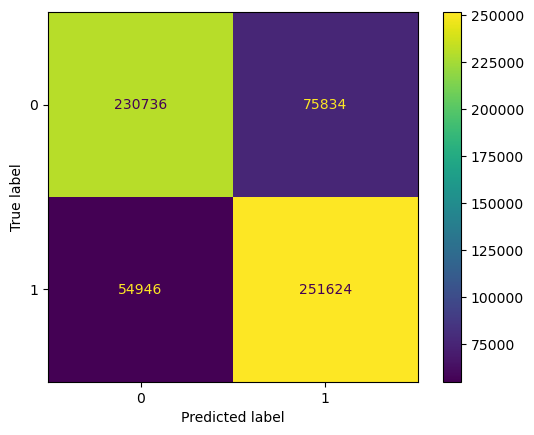

In [116]:
ConfusionMatrixDisplay.from_estimator(grid_boost, X_test_scaled2, y_test_sample);

<a id="next"></a>
## Next Steps

#### Train/Test Split

Now that basic modeling has been performed, more advanced modeling can be experimented with. More specifically, using pre-trained neural networks (BERT) and fine-tuning it to try to classify the reviews. This will all be done in the next notebook.

In [9]:
# assigning Reviewer_Score as target variable and everything else as X 
X_sample = sampled_df.drop(columns=['star_rating'])
y_sample = sampled_df['star_rating']

# splitting the data 
X_remainder_sample, X_test_sample, y_remainder_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.2, random_state=1, stratify=y_sample)

In [10]:
# Creating a validation set
X_train_sample, X_valid_sample, y_train_sample, y_valid_sample = train_test_split(X_remainder_sample, y_remainder_sample, test_size=0.2, random_state=1, stratify=y_remainder_sample)

#### Vectorization

The `review_body` and `review_headline` need to be vectorized so there is only numeric columns before modeling can be done. For vectorizing, bag of words will be used.

In [11]:
X_train_review_sample = X_train_sample['review_body']
X_valid_review_sample = X_valid_sample['review_body']
X_test_review_sample = X_test_sample['review_body']

# X_remainder will be needed for when cv is being done
X_remainder_review_sample = X_remainder_sample['review_body']

In [12]:
# sampled_df = sampled_df.drop(columns=['product_title', 'review_headline', 'review_body'])

In [13]:
%%time
# Instantiate
stemmer = PorterStemmer()

bag_body = CountVectorizer(stop_words="english", min_df=250)

# Fitting 
bag_body.fit(X_train_review_sample)


# Transform
train_bag_sample = bag_body.transform(X_train_review_sample)
valid_bag_sample = bag_body.transform(X_valid_review_sample)
test_bag_sample = bag_body.transform(X_test_review_sample)

CPU times: user 1.93 s, sys: 0 ns, total: 1.93 s
Wall time: 1.93 s


In [14]:
%%time
# This one is for X_remainder when cv is not done 

### For X_remainder
bag_body2 = CountVectorizer(stop_words="english", min_df=250)
bag_body2.fit(X_remainder_review_sample)
remainder_bag_sample = bag_body2.transform(X_remainder_review_sample)
test_bag_sample2 = bag_body2.transform(X_test_review_sample)

CPU times: user 2.21 s, sys: 0 ns, total: 2.21 s
Wall time: 2.21 s


In [14]:
X_train_headline_sample = X_train_sample['review_headline']
X_valid_headline_sample = X_valid_sample['review_headline']
X_test_headline_sample = X_test_sample['review_headline']
# X_remainder will be needed for when cv is being done
X_remainder_headline_sample = X_remainder_sample['review_headline']

In [15]:
%%time
# Instantiate
bag_headline = CountVectorizer(stop_words="english", min_df=50)

# Fitting 
bag_headline.fit(X_train_headline_sample)

# Transform
train_headline_sample = bag_headline.transform(X_train_headline_sample)
valid_headline_sample = bag_headline.transform(X_valid_headline_sample)
test_headline_sample = bag_headline.transform(X_test_headline_sample)

CPU times: total: 406 ms
Wall time: 399 ms


In [16]:
%%time
# For X_remainder
bag_headline2 = CountVectorizer(stop_words="english", min_df=50)
bag_headline2.fit(X_remainder_headline_sample)
remainder_headline_sample = bag_headline2.transform(X_remainder_headline_sample)
test_headline_sample2 = bag_headline2.transform(X_test_headline_sample)

CPU times: total: 453 ms
Wall time: 457 ms


In [17]:
bag_headline.get_feature_names_out()

array(['adorable', 'amazing', 'ankle', 'apart', 'arch', 'asics',
       'awesome', 'bad', 'bag', 'balance', 'beautiful', 'best', 'better',
       'beware', 'big', 'bigger', 'bit', 'black', 'boot', 'boots',
       'bought', 'box', 'buy', 'casual', 'cheap', 'clarks', 'color',
       'comfort', 'comfortable', 'comfy', 'cool', 'crocs', 'cute',
       'daughter', 'day', 'deal', 'design', 'did', 'didn', 'disappointed',
       'don', 'durable', 'easy', 'em', 'excellent', 'expected',
       'extremely', 'fabulous', 'fantastic', 'far', 'fast', 'favorite',
       'feel', 'feels', 'feet', 'fine', 'fit', 'fits', 'flat', 'flip',
       'flop', 'flops', 'foot', 'fun', 'gift', 'good', 'gorgeous', 'got',
       'great', 'half', 'happy', 'hard', 'heel', 'high', 'hiking',
       'husband', 'just', 'large', 'larger', 'leather', 'light',
       'lightweight', 'like', 'liked', 'little', 'long', 'look',
       'looking', 'looks', 'love', 'loved', 'loves', 'men', 'money',
       'narrow', 'need', 'new', 'nic

In [18]:
# combining headline and bag counts
train_count = sp.hstack([train_headline_sample, train_bag_sample])
valid_count = sp.hstack([valid_headline_sample, valid_bag_sample])
test_count = sp.hstack([test_headline_sample, test_bag_sample])

In [19]:
# combining headline and bag counts
remainder_count = sp.hstack([remainder_headline_sample, remainder_bag_sample])
test_count2 = sp.hstack([test_headline_sample2, test_bag_sample2])

In [20]:
train_count

<28000x500 sparse matrix of type '<class 'numpy.int64'>'
	with 333451 stored elements in Compressed Sparse Row format>

In [21]:
body_words = bag_body.get_feature_names_out()
tagged_body_words = ['b_' + feature for feature in body_words]
headline_words = bag_headline.get_feature_names_out()
tagged_headline_words = ['h_' + feature for feature in headline_words]
sample_vocab = tagged_headline_words + tagged_body_words

In [22]:
# FOR X_REMAINDER
body_words2 = bag_body2.get_feature_names_out()
tagged_body_words2 = ['b_' + feature for feature in body_words2]
headline_words2 = bag_headline2.get_feature_names_out()
tagged_headline_words2 = ['h_' + feature for feature in headline_words2]
sample_vocab2 = tagged_headline_words2 + tagged_body_words2

In [23]:
len(sample_vocab)

500

In [24]:
train_count

<28000x500 sparse matrix of type '<class 'numpy.int64'>'
	with 333451 stored elements in Compressed Sparse Row format>

In [25]:
train_df = pd.DataFrame(train_count.toarray(), columns=sample_vocab)
valid_df = pd.DataFrame(valid_count.toarray(), columns=sample_vocab)
test_df = pd.DataFrame(test_count.toarray(), columns=sample_vocab)

In [26]:
# For X_remainder
remainder_df = pd.DataFrame(remainder_count.toarray(), columns=sample_vocab2)
test_df2 = pd.DataFrame(test_count2.toarray(), columns=sample_vocab2)

In [27]:
X_train_sample = X_train_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])
X_valid_sample = X_valid_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])
X_test_sample = X_test_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])

In [28]:
# For X_remainder
X_remainder_sample = X_remainder_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])

In [29]:
combined_train = pd.concat([X_train_sample, train_df], axis=1)
combined_valid = pd.concat([X_valid_sample, valid_df], axis=1)
combined_test = pd.concat([X_test_sample, test_df], axis=1)

In [30]:
# For X_remainder
combined_remainder = pd.concat([X_remainder_sample, remainder_df], axis=1)
combined_test2 = pd.concat([X_test_sample, test_df2], axis=1)

In [31]:
combined_test2

,helpful_votes,total_votes,verified_purchase,year,month,h_10,h_absolutely,h_adorable,h_amazing,h_ankle,...,b_worked,b_working,b_works,b_worn,b_worth,b_wouldn,b_wrong,b_year,b_years,b_zipper
0,1,1,0,2011,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,2014,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2015,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,2014,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,2015,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,2015,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,2,2,1,2014,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,1,2014,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,1,2015,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Instantiate
ss = StandardScaler()

# Fit and tranform
X_train_scaled = ss.fit_transform(combined_train)
X_valid_scaled = ss.transform(combined_valid)
X_test_scaled = ss.transform(combined_test)

In [33]:
# For X_remainder
ss2 = StandardScaler()
X_remainder_scaled = ss.fit_transform(combined_remainder)
X_test_scaled2 = ss.transform(combined_test2)